In [1]:
# import the library
# kernel must be [conda env:gl-env]
import graphlab as gl

In [2]:
import os
import urllib

## Download file if it does not exist
if not os.path.isfile('../data/song_data.csv'):
    print('Downloading song_data.csv...')
    %time urllib.urlretrieve('https://static.turi.com/datasets/millionsong/song_data.csv', '../data/song_data.csv')
if not os.path.isfile('../data/10000.txt'):
    print('Downloading 10000.txt...')
    %time urllib.urlretrieve('https://static.turi.com/datasets/millionsong/10000.txt', '../data/10000.txt')

##  Import data for the songs
songs = gl.SFrame.read_csv("../data/song_data.csv")

This non-commercial license of GraphLab Create for academic use is assigned to kjprice@smu.edu and will expire on August 04, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1502920769.log


Finished parsing file /Users/kjprice/Projects/smu/smu-data-mining/DataMiningProject/data/song_data.csv

Parsing completed. Parsed 100 lines in 0.898672 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 392947

Finished parsing file /Users/kjprice/Projects/smu/smu-data-mining/DataMiningProject/data/song_data.csv

Parsing completed. Parsed 1000000 lines in 2.12277 secs.

In [3]:
# Import the data for the plays per user per song
usage_data = gl.SFrame.read_csv("../data/10000.txt",
                                header=False,
                                delimiter='\t',
                                column_type_hints={'X3':int})

Unable to parse line "be941a98402c5f6f300fe4b48cc92b1f7e1bdb1c	SONEJIJ1"

1 lines failed to parse correctly

Finished parsing file /Users/kjprice/Projects/smu/smu-data-mining/DataMiningProject/data/10000.txt

Parsing completed. Parsed 100 lines in 0.828169 secs.

Unable to parse line "be941a98402c5f6f300fe4b48cc92b1f7e1bdb1c	SONEJIJ1"

1 lines failed to parse correctly

Finished parsing file /Users/kjprice/Projects/smu/smu-data-mining/DataMiningProject/data/10000.txt

Parsing completed. Parsed 807216 lines in 0.891186 secs.

In [4]:
# Review the header of the song data
songs.head()

song_id,title,release,artist_name,year
SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze PresentsWinter Sessions ...,Der Mystic,0
SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor""Sinfonie ...",Berwald: Symphonies Nos.1/2/3/4 ...,David Montgomery,0
SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
SOJCFMH12A8C13B0C2,Mama_ mama can't you see? ...,March to cadence with theUS marines ...,The Sun Harbor's Chorus-Documentary Recordings ...,0


In [5]:
#Review data for the usage.   
usage_data

X1,X2,X3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


In [6]:
# Change data labels to be human readable 
usage_data.rename({'X1':'user', 'X2': 'song', 'X3': 'plays'})

user,song,plays
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


### Want to add code to change the song to the name from the song data & perhaps change user information to something less complex (new user ID)

In [7]:
#recommendation model

model = gl.recommender.create(usage_data, user_id = "user", item_id="song", target = "plays")
results = model.recommend(users=None, k=5)
model.save("my_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 807216 observations with 31173 users and 10000 items.

Data prepared in: 1.0274s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 100902 / 807216 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 55.8878                                  |

| 6       | 0.012207          | 62.3306                                  |

| 7       | 0.00610352        | 65.5966                                  |

| 8       | 0.00305176        | 68.9111                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 55.8878                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 136us        | 80.6174           | 6.41264               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 445.764ms    | 98.1808           | 8.18484               | 0.0244141   |

| 2       | 897.134ms    | 93.6689           | 7.87186               | 0.0145167   |

| 3       | 1.33s        | 72.6584           | 6.65257               | 0.0107102   |

| 4       | 1.74s        | 60.164            | 5.85912               | 0.00725834  |

| 5       | 2.10s        | 51.4868           | 5.22321               | 0.00613981  |

| 6       | 2.47s        | 45.6265           | 4.75873               | 0.00535512  |

| 10      | 3.81s        | 34.6603           | 3.8454                | 0.00365075  |

| 11      | 4.11s        | 33.0849           | 3.71843               | 0.0033989   |

| 15      | 5.30s        | 28.9931           | 3.39382               | 0.00269348  |

| 20      | 6.78s        | 25.5543           | 3.08745               | 0.00217075  |

| 25      | 8.25s        | 23.3835           | 2.89876               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 21.9741

Final training RMSE: 2.62353

recommendations finished on 1000/31173 queries. users per second: 24803.4

recommendations finished on 2000/31173 queries. users per second: 25112.1

recommendations finished on 3000/31173 queries. users per second: 25063.3

recommendations finished on 4000/31173 queries. users per second: 25588.5

recommendations finished on 5000/31173 queries. users per second: 25647.2

recommendations finished on 6000/31173 queries. users per second: 25132.9

recommendations finished on 7000/31173 queries. users per second: 25558.5

recommendations finished on 8000/31173 queries. users per second: 25906.1

recommendations finished on 9000/31173 queries. users per second: 26211.1

recommendations finished on 10000/31173 queries. users per second: 26473.7

recommendations finished on 11000/31173 queries. users per second: 26579.4

recommendations finished on 12000/31173 queries. users per second: 26719

recommendations finished on 13000/31173 queries. users per second: 26729.3

recommendations finished on 14000/31173 queries. users per second: 26882.5

recommendations finished on 15000/31173 queries. users per second: 27025

recommendations finished on 16000/31173 queries. users per second: 26945.8

recommendations finished on 17000/31173 queries. users per second: 26811.9

recommendations finished on 18000/31173 queries. users per second: 26867.8

recommendations finished on 19000/31173 queries. users per second: 26888.2

recommendations finished on 20000/31173 queries. users per second: 26790.9

recommendations finished on 21000/31173 queries. users per second: 26625.9

recommendations finished on 22000/31173 queries. users per second: 26501.2

recommendations finished on 23000/31173 queries. users per second: 26416.1

recommendations finished on 24000/31173 queries. users per second: 26319.1

recommendations finished on 25000/31173 queries. users per second: 26141.6

recommendations finished on 26000/31173 queries. users per second: 25916.3

recommendations finished on 27000/31173 queries. users per second: 25695.1

recommendations finished on 28000/31173 queries. users per second: 25584.5

recommendations finished on 29000/31173 queries. users per second: 25558.2

recommendations finished on 30000/31173 queries. users per second: 25478

recommendations finished on 31000/31173 queries. users per second: 25486

In [8]:
results # the recommendation output

user,song,score,rank
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAJAFJ12A58A7B75A,7.21955409662,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODCNJX12A6D4F93CB,7.18616023676,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOISSYK12A6D4F78A8,6.56567969934,3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOCNCGL127D9786D66,5.50567689554,4
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOXWYZP12AF72A42A6,4.4310559334,5
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOFLJQZ12A6D4FADA6,2.89539961533,1
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOWCKVR12A8C142411,2.66155432181,2
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSXLTC12AF72A7F54,2.54987071471,3
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSYOHI12A8C144584,2.52258561568,4
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SODGJKH12AAA8C9487,2.14238582568,5


In [9]:
results[300:310]

user,song,score,rank
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOIMTII12A6D4F662A,4.14216485636,1
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOYSADG12A8AE47F2C,3.68114462511,2
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SODUGQV12AF72A6803,3.12608209268,3
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOTDGVF12A8AE45ECF,3.02236619608,4
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOBONKR12A58A7A7E0,3.015032679,5
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOOALOT12A8C13ABD9,4.30010053532,1
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOAZZRU12AB0182B0E,4.22587844746,2
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOZQRSR12A6701E2F7,3.82372400181,3
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOWGCMN12A8C136E44,3.66505977528,4
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SODVWOV12A6D4FB6D2,3.26374742405,5


Above shows the top 5 ratings for each user

In [10]:
usage_data.head()

user,song,plays
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


In [11]:
results

user,song,score,rank
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAJAFJ12A58A7B75A,7.21955409662,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODCNJX12A6D4F93CB,7.18616023676,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOISSYK12A6D4F78A8,6.56567969934,3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOCNCGL127D9786D66,5.50567689554,4
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOXWYZP12AF72A42A6,4.4310559334,5
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOFLJQZ12A6D4FADA6,2.89539961533,1
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOWCKVR12A8C142411,2.66155432181,2
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSXLTC12AF72A7F54,2.54987071471,3
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSYOHI12A8C144584,2.52258561568,4
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SODGJKH12AAA8C9487,2.14238582568,5


In [12]:
item_item = gl.recommender.item_similarity_recommender.create(usage_data,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head

Recsys training: model = item_similarity

Preparing data set.

Data has 807216 observations with 31173 users and 10000 items.

Data prepared in: 1.08818s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.3ms                          | 3          |

| 23.674ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 315.319ms                           | 0                | 0               |

| 1.01s                               | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.05639s

<bound method SFrame.head of Columns:
	song	str
	similar	str
	score	float
	rank	int

Rows: 29988

Data:
+--------------------+--------------------+----------------+------+
|        song        |      similar       |     score      | rank |
+--------------------+--------------------+----------------+------+
| SOAKIMP12A8C130995 | SOPCVQE12AC468AF36 | 0.666932046413 |  1   |
| SOAKIMP12A8C130995 | SOYHEPA12A8C13097F | 0.561596691608 |  2   |
| SOAKIMP12A8C130995 | SOKMXEQ12A6D4F6AA8 | 0.532684504986 |  3   |
| SOBBMDR12A8C13253B | SONQAWV12A6310F99A | 0.569074392319 |  1   |
| SOBBMDR12A8C13253B | SOLAWCM12A6701BEE0 | 0.413277864456 |  2   |
| SOBBMDR12A8C13253B | SOJYDZV12AAF3B53F2 | 0.339596867561 |  3   |
| SOBXHDL12A81C204C0 | SOQLDAV12AF72A0AA9 | 0.476936221123 |  1   |
| SOBXHDL12A81C204C0 | SOGKGLB12A81C22AFA | 0.287569344044 |  2   |
| SOBXHDL12A81C204C0 | SORENAS12A81C20780 | 0.236066818237 |  3   |
| SOBYHAJ12A6701BF1D | SOMYECL12A6701D9C8 | 0.694056391716 |  1   |
+-----------

In [13]:
#Break the data - train test - by user:  80% to train.  20% to test.   limit to 100 user for the real time for this example
train, test = gl.recommender.util.random_split_by_user(usage_data,
                                                      user_id="user", item_id="song",
                                                      max_num_users=100, item_test_proportion=0.2)

In [14]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                             only_top_k=5,
                                                             similarity_type="cosine")

rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Preparing data set.

Data has 806631 observations with 31173 users and 10000 items.

Data prepared in: 0.872823s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.585ms                        | 6.25       |

| 20.984ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 277.08ms                            | 0                | 0               |

| 841.076ms                           | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.880146s


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0430107526882 | 0.0104597463468 |
|   2    | 0.0483870967742 | 0.0174167230619 |
|   3    | 0.0322580645161 | 0.0174167230619 |
|   4    | 0.0349462365591 | 0.0254937714615 |
|   5    | 0.0408602150538 | 0.0429989015192 |
|   6    | 0.0358422939068 | 0.0439764186258 |
|   7    |  0.036866359447 | 0.0493147481577 |
|   8    | 0.0322580645161 | 0.0493147481577 |
|   9    | 0.0322580645161 |  0.059171378982 |
|   10   | 0.0311827956989 | 0.0611128365687 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 6.485314905857992)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
| 4a01a91b607e0c3bc3f8d9eac7.

In [15]:
#print rmse_results ('rmse_by_item')
print rmse_results.viewkeys()


dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [16]:
rmse_results['rmse_overall']

6.485314905857992

In [17]:
rmse_results['rmse_by_user']

user,count,rmse
d7816994ed00db78088a7a75c125c17af7611107 ...,1,1.0
c9f85e5836b836faafd214765c37bb40ce269f5b ...,4,1.32287565553
74dd6609af7b91b5564b2bd993f0bb90bcc3171b ...,14,10.3146780018
1f42cb24f03271a50012aa8d092e26a9bfd03dde ...,1,1.0
79b8c0f8828f28bd1cbe1531926915c8e169e2da ...,26,1.51531271761
f1f9cbc8f48feee490753eb5c10736b5fd8d5bae ...,16,2.14491444447
63f61ea74b33a2b2e0c873da7ec8c7e5cd128f87 ...,32,4.27041086888
445586115c0a5ef0454bfb81fcfe858254ef68aa ...,12,3.18870652799
86359c1c300e2a6b2bcf8037fc07d9231713f852 ...,2,7.78594517372
25c847dc1d33e2b43de9a41569c2feee473411c1 ...,11,1.10751279029


In [18]:
rmse_results['rmse_by_item']

song,count,rmse
SOSPTOE12A6D4F938C,1,9.0
SOCAFDI12A8C13D10E,1,1.0
SOSCIZP12AB0181D2F,1,2.0
SONQBUB12A6D4F8ED0,1,1.0
SOCKSGZ12A58A7CA4B,2,5.07888985937
SOQBUFQ12A6D4F7F4C,1,6.68139866091
SOWYHRX12AB01861CD,1,1.0
SOGQANL12A6701E099,1,6.0
SOCXBTX12A8C132F5A,1,1.32025809008
SOKRYCJ12A8C13D0F0,1,10.0


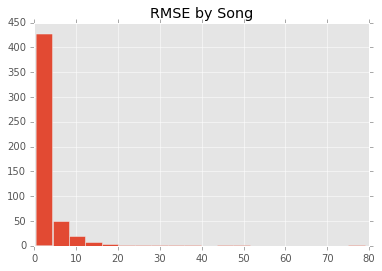

In [19]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']

plt.hist(rmsevals, bins=20)
plt.title('RMSE by Song')
plt.show()

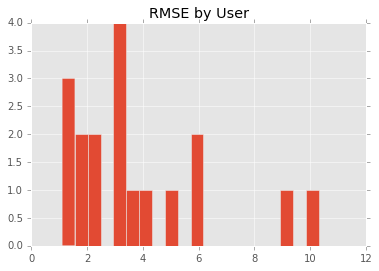

In [20]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]


plt.hist(rmsevals, bins=20)
plt.title('RMSE by User')
plt.show()

In [21]:
rmse_results['rmse_by_user']

user,count,rmse
d7816994ed00db78088a7a75c125c17af7611107 ...,1,1.0
c9f85e5836b836faafd214765c37bb40ce269f5b ...,4,1.32287565553
74dd6609af7b91b5564b2bd993f0bb90bcc3171b ...,14,10.3146780018
1f42cb24f03271a50012aa8d092e26a9bfd03dde ...,1,1.0
79b8c0f8828f28bd1cbe1531926915c8e169e2da ...,26,1.51531271761
f1f9cbc8f48feee490753eb5c10736b5fd8d5bae ...,16,2.14491444447
63f61ea74b33a2b2e0c873da7ec8c7e5cd128f87 ...,32,4.27041086888
445586115c0a5ef0454bfb81fcfe858254ef68aa ...,12,3.18870652799
86359c1c300e2a6b2bcf8037fc07d9231713f852 ...,2,7.78594517372
25c847dc1d33e2b43de9a41569c2feee473411c1 ...,11,1.10751279029


In [22]:
#looking at recall and precision
rmse_results['precision_recall_by_user']

user,cutoff,precision,recall,count
01c721ac426e0e45fa2cb981d390e0888641f24c ...,1,0.0,0.0,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,2,0.5,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,3,0.333333333333,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,4,0.25,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,5,0.2,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,6,0.166666666667,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,7,0.142857142857,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,8,0.125,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,9,0.111111111111,0.0625,16
01c721ac426e0e45fa2cb981d390e0888641f24c ...,10,0.1,0.0625,16


In [23]:
#do the aggregate

import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [ agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group(group the restuls by 'k' which is the cutoff)
# the cutoff is the number of top items to look for 
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#

rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.0315860215054,0.0539311899133,0.104710293473,0.195355773377
10,0.0311827956989,0.0718099262669,0.0611128365687,0.154992911578
36,0.0301672640382,0.0406651670851,0.225284524382,0.285604252281
26,0.0326716294458,0.044032528219,0.185705836162,0.263515638252
41,0.0288486755835,0.0383474990326,0.237169510662,0.284228459975
3,0.0322580645161,0.11000723479,0.0174167230619,0.0726385542941
1,0.0430107526882,0.202881314668,0.0104597463468,0.0622827178403
6,0.0358422939068,0.100326415787,0.0439764186258,0.137184536939
11,0.0312805474096,0.06731396012,0.073657639436,0.169128752787
2,0.0483870967742,0.165010852185,0.0174167230619,0.0726385542941


## Cross Validated Collaborative Filtering

In [24]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays")

rmse_results = recl.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 806631 observations with 31173 users and 10000 items.

Data prepared in: 0.947827s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 100828 / 806631 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 58.4427                                  |

| 6       | 0.012207          | 65.5619                                  |

| 7       | 0.00610352        | 71.5224                                  |

| 8       | 0.00305176        | 74.8733                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 58.4427                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 122us        | 80.6293           | 6.41311               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 305.943ms    | 91.9174           | 7.85533               | 0.0244141   |

| 2       | 609.425ms    | 89.6689           | 7.68402               | 0.0145167   |

| 3       | 898.444ms    | 71.6667           | 6.60988               | 0.0107102   |

| 4       | 1.20s        | 59.3116           | 5.8036                | 0.00725834  |

| 5       | 1.50s        | 50.8895           | 5.19602               | 0.00613981  |

| 6       | 1.80s        | 45.1762           | 4.73373               | 0.00535512  |

| 10      | 3.00s        | 34.4292           | 3.84062               | 0.00365075  |

| 11      | 3.30s        | 33.1312           | 3.74754               | 0.0033989   |

| 15      | 4.51s        | 28.6799           | 3.36864               | 0.00269348  |

| 20      | 6.05s        | 25.6435           | 3.11812               | 0.00217075  |

| 25      | 7.50s        | 23.3802           | 2.89305               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 21.866

Final training RMSE: 2.61756


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    |  0.010752688172 | 0.00358422939068 |
|   2    |  0.010752688172 | 0.00627240143369 |
|   3    | 0.0143369175627 | 0.00795250896057 |
|   4    | 0.0134408602151 | 0.00862455197133 |
|   5    | 0.0129032258065 |  0.012208781362  |
|   6    | 0.0197132616487 | 0.0200827622199  |
|   7    | 0.0184331797235 | 0.0209788195675  |
|   8    | 0.0174731182796 | 0.0225149178778  |
|   9    | 0.0167264038232 |  0.023590186695  |
|   10   | 0.0172043010753 | 0.0280015459451  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.719423362783216)

Per User RMSE (best)
+-------------------------------+-------+-----------------+
|              user             | count |       rmse      |
+-------------------------------+-------+-----------------+
| c3fa61e398

In [25]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])
# actually made it worse

cutoff,Avg of precision,Stdv of precision,Avg of recall
16,0.0168010752688,0.0368215793866,0.0429805802259
10,0.0172043010753,0.0499971094089,0.0280015459451
36,0.015531660693,0.0353863876216,0.0763047475696
26,0.0165425971878,0.0344924060579,0.0667750747335
41,0.014948859166,0.03355912183,0.0839195118376
3,0.0143369175627,0.0676271048893,0.00795250896057
1,0.010752688172,0.103136161792,0.00358422939068
6,0.0197132616487,0.063966194615,0.0200827622199
11,0.0185728250244,0.049090438043,0.0297286494867
2,0.010752688172,0.0725308471142,0.00627240143369


In [26]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                              num_factors=16,  #override default
                                                              regularization=1e-02,
                                                              linear_regularization = 1e-3)

rmse_results = recl.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 806631 observations with 31173 users and 10000 items.

Data prepared in: 0.797079s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 100828 / 806631 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00913421        | Not Viable                               |

| 1       | 0.00228355        | 77.1865                                  |

| 2       | 0.00114178        | 77.7057                                  |

| 3       | 0.000570888       | 78.1325                                  |

| 4       | 0.000285444       | 78.4207                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00228355        | 77.1865                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 87us         | 80.6294           | 6.41312               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 403.709ms    | DIVERGED          | DIVERGED              | 0.00228355  |

| RESET   | 537.624ms    | 80.6277           | 6.41311               |             |

| 1       | 926.341ms    | DIVERGED          | DIVERGED              | 0.00114178  |

| RESET   | 1.06s        | 80.6282           | 6.41311               |             |

| 1       | 1.45s        | DIVERGED          | DIVERGED              | 0.000570888 |

| RESET   | 1.59s        | 80.6286           | 6.41311               |             |

| 1       | 1.87s        | 79.977            | 6.38679               | 0.000285444 |

| 2       | 2.14s        | 79.1151           | 6.36651               | 8.64332e-05 |

| 3       | 2.40s        | 78.9263           | 6.36238               | 5.0927e-05  |

| 4       | 2.67s        | 78.8394           | 6.36014               | 3.60982e-05 |

| 5       | 2.95s        | 78.7851           | 6.35862               | 2.79575e-05 |

| 6       | 3.22s        | 78.7505           | 6.35759               | 2.28129e-05 |

| 7       | 3.53s        | 78.7244           | 6.35672               | 1.92674e-05 |

| 11      | 4.62s        | 78.6676           | 6.35459               | 1.18812e-05 |

| 12      | 4.89s        | 78.6586           | 6.35421               | 1.08421e-05 |

| 17      | 6.23s        | 78.6335           | 6.35284               | 7.54351e-06 |

| 22      | 7.57s        | 78.6179           | 6.35192               | 5.78383e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 78.6188

Final training RMSE: 6.35151


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0215053763441 | 0.00456174649723 |
|   2    | 0.0215053763441 | 0.00615692551176 |
|   3    | 0.0179211469534 | 0.00884509755477 |
|   4    | 0.0188172043011 |  0.013773412967  |
|   5    | 0.0215053763441 | 0.0169320151175  |
|   6    | 0.0215053763441 |  0.019543382245  |
|   7    | 0.0184331797235 |  0.019543382245  |
|   8    | 0.0188172043011 | 0.0233068231052  |
|   9    | 0.0191158900836 | 0.0284271508062  |
|   10   | 0.0193548387097 | 0.0296651247734  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 5.710674304355242)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
| 1a75748e57947

In [27]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall
16,0.0201612903226,0.0503359766427,0.043005055452
10,0.0193548387097,0.0492045642522,0.0296651247734
36,0.0110513739546,0.0244885913892,0.0575174248031
26,0.0132340777502,0.0321518473541,0.0501735142334
41,0.0104904274849,0.0230132818972,0.0604726908632
3,0.0179211469534,0.0751834299764,0.00884509755477
1,0.0215053763441,0.145061694228,0.00456174649723
6,0.0215053763441,0.0609845861189,0.019543382245
11,0.0185728250244,0.0472455365536,0.0300011462787
2,0.0215053763441,0.101440657334,0.00615692551176


## Is this better than the item item matrix

In [28]:
comparison = gl.recommender.util.compare_models(test, [item_item, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0430107526882 | 0.0104597463468 |
|   2    | 0.0483870967742 | 0.0174167230619 |
|   3    | 0.0322580645161 | 0.0174167230619 |
|   4    | 0.0349462365591 | 0.0254937714615 |
|   5    | 0.0408602150538 | 0.0429989015192 |
|   6    | 0.0358422939068 | 0.0439764186258 |
|   7    |  0.036866359447 | 0.0493147481577 |
|   8    | 0.0322580645161 | 0.0493147481577 |
|   9    | 0.0322580645161 |  0.059171378982 |
|   10   | 0.0311827956989 | 0.0611128365687 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 6.485314905857992)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
|

In [29]:
comparisonstruct = gl.compare(test, [item_item, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0430107526882 | 0.0104597463468 |
|   2    | 0.0483870967742 | 0.0174167230619 |
|   3    | 0.0322580645161 | 0.0174167230619 |
|   4    | 0.0349462365591 | 0.0254937714615 |
|   5    | 0.0408602150538 | 0.0429989015192 |
|   6    | 0.0358422939068 | 0.0439764186258 |
|   7    |  0.036866359447 | 0.0493147481577 |
|   8    | 0.0322580645161 | 0.0493147481577 |
|   9    | 0.0322580645161 |  0.059171378982 |
|   10   | 0.0311827956989 | 0.0611128365687 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0215

In [30]:
gl.show_comparison(comparisonstruct,[item_item, recl])

User item_item matrix for anything more than 1

## Parameters, Parameters
# RUNNING FOR 5 MODELS IS TIME CONSUMING.   TIME 

In [31]:
#Run moving the # of models to 3 for time.

params = {'user_id': 'user',
         'item_id': 'song',
         'target': 'plays',
         'num_factors': [8, 12, 16, 24, 32],
         'regularization': [0.001] ,
         'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
                                      gl.recommender.ranking_factorization_recommender.create,
                                      params,
                                      max_models=5,
                                      environment=None)

# also note this evaluator also support sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html
# None means it is locally hosted

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-16-2017-17-00-2700000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-16-2017-17-00-2700000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-16-2017-17-00-2700000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-16-2017-17-00-2700000-ace6d'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-16-2017-17-00-2700000-ace6d' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-16-2017-17-00-2700000-ace6d' scheduled.


In [32]:
job.get_status()

{'Canceled': 0, 'Completed': 0, 'Failed': 0, 'Pending': 5, 'Running': 0}

In [33]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,song,0.001,25,16,8,0.25
0,song,0.001,50,12,4,0.1
3,song,0.001,50,24,8,0.5
2,song,0.001,50,16,4,0.5
4,song,0.001,50,24,4,0.5
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,plays,user,0.0629390818978,0.014054637702,6.02044400404,0.0258064516129
0.001,plays,user,0.0399576556636,0.00928017442729,6.005753789,0.00860215053763
0.001,plays,user,0.0741474994386,0.0181247630925,6.45614234927,0.0258064516129
0.001,plays,user,0.072780932217,0.0181651466503,6.44377727881,0.0258064516129


In [34]:
bst_prms = job.get_best_params()
bst_prms
# the restuls show 4 neg sample and 24 factors (his was 12)

{'item_id': 'song',
 'linear_regularization': 0.001,
 'max_iterations': 50,
 'num_factors': 12,
 'num_sampled_negative_examples': 4,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'plays',
 'user_id': 'user'}

In [35]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : user
 Item ID                          : song
 Target                           : plays
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 806631
 Number of users                  : 31173
 Number of items                  : 10000
 
 Training summary
 ----------------
 Training time                    : 16.2825
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 12
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 regul

In [36]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    |  0.010752688172  | 0.00358422939068 |
|   2    |  0.010752688172  | 0.00441135925007 |
|   3    |  0.010752688172  | 0.00709953129308 |
|   4    |  0.010752688172  | 0.00817480011028 |
|   5    | 0.00860215053763 | 0.00817480011028 |
|   6    | 0.00716845878136 | 0.00817480011028 |
|   7    | 0.00768049155146 |  0.011759029501  |
|   8    | 0.00806451612903 | 0.0128342983182  |
|   9    | 0.00955794504182 | 0.0191066997519  |
|   10   | 0.00967741935484 | 0.0200842168584  |
+--------+------------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+---------

In [37]:
models[1]

Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : user
Item ID                          : song
Target                           : plays
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 806631
Number of users                  : 31173
Number of items                  : 10000

Training summary
----------------
Training time                    : 12.5534

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 16
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 25

Regularization Settings
-----------------------
regularization                   : 0.001
regularization_type              : norma

most are the similar.   when cut off less than 10 - about the same.   
can do machine learning.  see the code below for the function that is your friend. - supports sklearn

many features for the item